In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
#set working directory
os.chdir("C:/Users/auran/Desktop/Shaquib Dataset/Regression/Churn Reduction")

In [3]:
#load the data
#reading the training and the test data csv file
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("Test_data.csv")

In [4]:
#Head of train_data
train_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#Shape of train data
train_data.shape

(3333, 21)

In [6]:
#Head of test data
test_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [7]:
#Shape of test data
test_data.shape

(1667, 21)

In [8]:
#Concat train and test data
Dataset = pd.concat([train_data, test_data])

In [9]:
#Head of Dataset
Dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
#Shape of Dataset
Dataset.shape

(5000, 21)

In [11]:
#Columns of Dataset
Dataset.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')

In [12]:
numerical_column = train_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_column

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [13]:
categorical_column = train_data.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_column

['state', 'phone number', 'international plan', 'voice mail plan', 'Churn']

In [14]:
#converting categorical variables into numeric for train data set
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Dataset[['state', 'phone number', 'international plan', 'voice mail plan', 'Churn']] = Dataset[['state', 'phone number', 'international plan', 'voice mail plan', 'Churn']].apply(label_encoder.fit_transform)

In [15]:
#Head of Dataset after encoding
Dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
#Dataset info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 21 columns):
state                            5000 non-null int64
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null int64
international plan               5000 non-null int64
voice mail plan                  5000 non-null int64
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes               

In [17]:
#Statistical Description
Dataset.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


# Missing value

In [18]:
#Total number of missing value
Dataset.isnull().sum().sum()

0

# Outliers

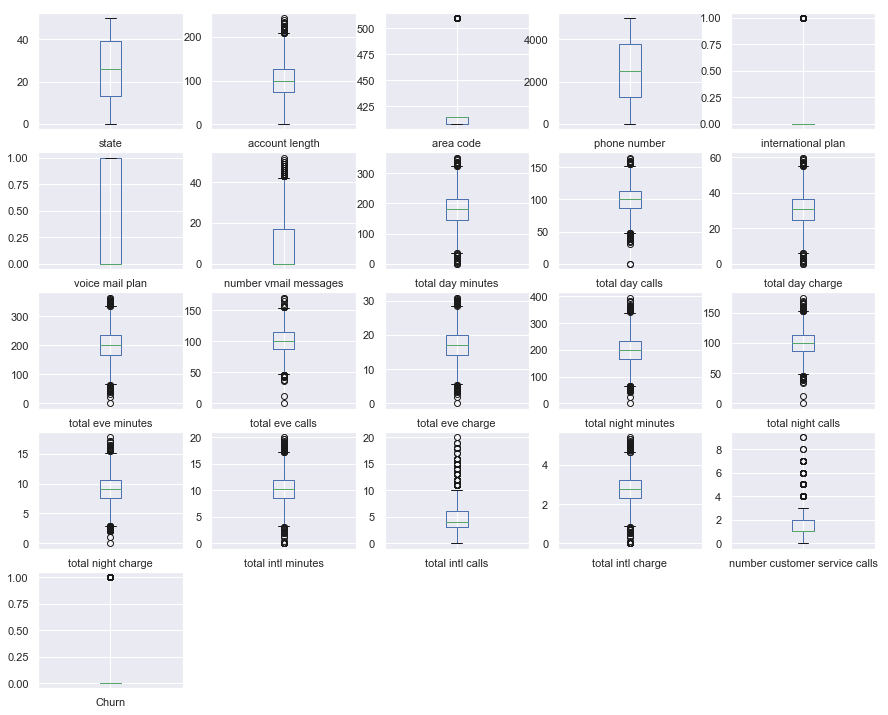

In [19]:
#Plot to see the outliers
Dataset.plot(kind="box",subplots=True,layout=(6,5),figsize=(15,15))
plt.show()

In [20]:
for i in numerical_column:
    print(i)
    q75,q25=np.percentile(Dataset[i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    print(min)
    max = q75+(iqr*1.5)
    print(max)
    Dataset.loc[Dataset[i]<min,i] = np.nan
    Dataset.loc[Dataset[i]>max,i] = np.nan

account length
-8.0
208.0
area code
397.5
425.5
number vmail messages
-25.5
42.5
total day minutes
34.94999999999999
324.95
total day calls
48.0
152.0
total day charge
5.949999999999999
55.230000000000004
total eve minutes
64.78750000000001
335.6875
total eve calls
46.5
154.5
total eve charge
5.5000000000000036
28.539999999999996
total night minutes
65.20000000000003
336.4
total night calls
48.0
152.0
total night charge
2.9349999999999987
15.135000000000002
total intl minutes
3.25
17.25
total intl calls
-1.5
10.5
total intl charge
0.8899999999999992
4.65
number customer service calls
-0.5
3.5


In [21]:
#Now check the null which has been created to outliers
Dataset.isnull().sum().sum()

2327

In [22]:
#Impute he null by mean
Dataset = Dataset.fillna(Dataset.mean())

In [23]:
#check the missing value after imputing by mean
Dataset.isnull().sum().sum()

0

# Feature Selection

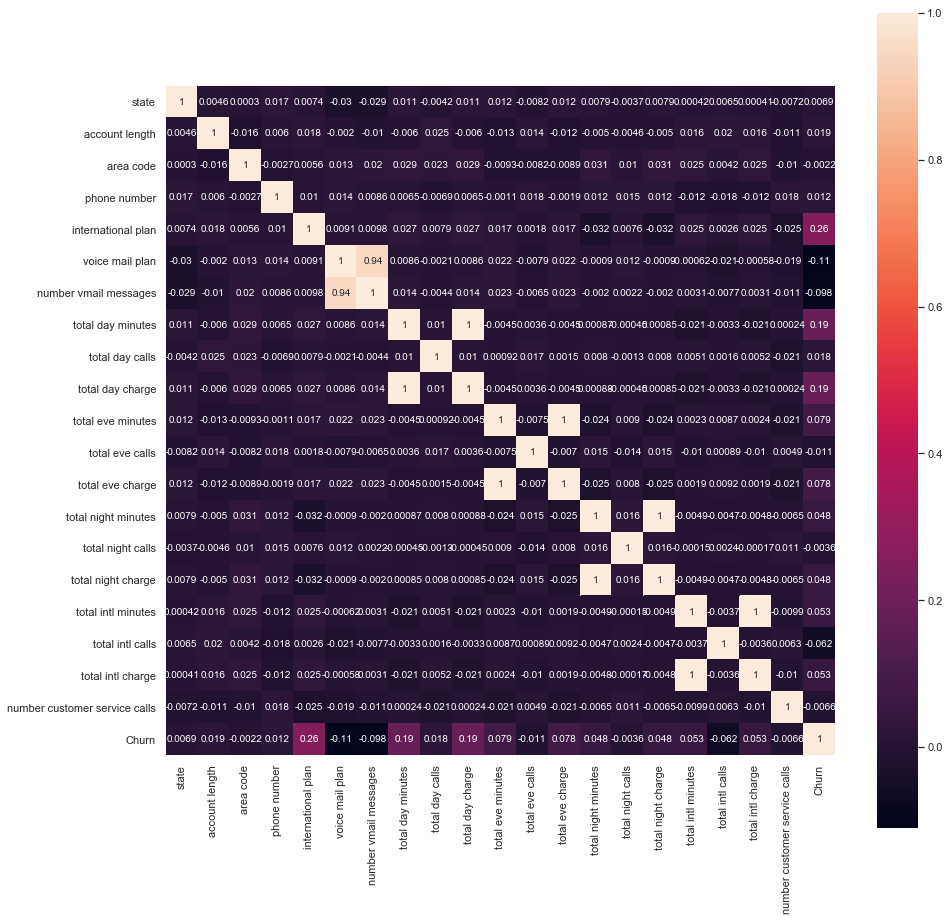

In [24]:
corr = Dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, square=True)

In [25]:
#Detect and delete correlated columns
target_features = abs(corr["Churn"])
relevant_features = target_features[target_features<0.75]
relevant_features_columns = relevant_features[:][:]
relevant_features_columns

state                            0.006946
account length                   0.018981
area code                        0.002243
phone number                     0.012371
international plan               0.259123
voice mail plan                  0.110698
number vmail messages            0.098438
total day minutes                0.187066
total day calls                  0.017825
total day charge                 0.187059
total eve minutes                0.078579
total eve calls                  0.011135
total eve charge                 0.078287
total night minutes              0.048300
total night calls                0.003615
total night charge               0.048296
total intl minutes               0.053151
total intl calls                 0.061995
total intl charge                0.053149
number customer service calls    0.006578
Name: Churn, dtype: float64

In [26]:
#Split Data into independent and dependent
X = Dataset[['account length','area code','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','number customer service calls']]
y = Dataset["Churn"]

In [27]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Feature Scaling

In [28]:
#Scale the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model

# Logistic Regression

In [29]:
#Import Logistic Regression and initiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)
prediction1 = Logistic_Regression.predict(X_test)

In [30]:
#Accuracy metrics
from sklearn import metrics
print("accuracy_score",metrics.accuracy_score(prediction1,y_test))

accuracy_score 0.868


# K Nearest Neighbor

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)

In [32]:
#Train the classifier and fit the data
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
#Accuracy
KNN_model.score(X_test, y_test)

0.8533333333333334

# Decision Tree

In [34]:
#Decision Tree algorithm
from sklearn import tree

In [35]:
Decision_tree = tree.DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
prediction2 = Decision_tree.predict(X_test)
prediction2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn import metrics
metrics.accuracy_score(prediction2,y_test)

0.8566666666666667

#  Gradient Boosting Decision Tree

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_Boosting_Classifier = GradientBoostingClassifier()
Gradient_Boosting_Classifier.fit(X_train,y_train)

C:\Users\auran\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
prediction3 = Gradient_Boosting_Classifier.predict(X_test)
prediction3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn import metrics
metrics.accuracy_score(prediction3,y_test)

0.9093333333333333

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=200)
Random_Forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
prediction4 = Random_Forest.predict(X_test)
prediction4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn import metrics
metrics.accuracy_score(prediction4,y_test)

0.9166666666666666

# Support Vector Machine

In [44]:
#Build the model with SVM algorithm
from sklearn import svm
classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
prediction5 = classifier.predict(X_test)

In [45]:
# Accuracy of predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction5)

0.8886666666666667

# Naive Bayes

In [46]:
#Specific implementation of Naive byes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() # instantiate the Naive byes object
naive_bayes.fit(X_train,y_train)
prediction6 = naive_bayes.predict(X_test)
prediction6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
from sklearn import metrics
metrics.accuracy_score(y_test,prediction6)

0.88

# Adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
Ada_Boost_Classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)

# Train Adaboost Classifer
model = Ada_Boost_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
prediction7 = model.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(y_test, prediction7)

0.8773333333333333